 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [57]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [58]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
#pull in and read csv file
whale_df = pd.read_csv(whale_returns_csv)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [59]:
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)

In [60]:
# Count nulls
# YOUR CODE HERE
#count the sum of null values found in df
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [61]:
# Drop nulls
# YOUR CODE HERE
#drop null values in df
whale_df.dropna(inplace=True)
whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
2019-04-25,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [62]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
#pull in and read csv file
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [63]:
#set index of df as date
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)

In [64]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [65]:
# Drop nulls
# YOUR CODE HERE
#drop null values in df
algo_returns_df.dropna(inplace=True)
algo_returns_df

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761
...,...,...,...
2019-04-25,2019-04-25,0.000682,-0.007247
2019-04-26,2019-04-26,0.002981,0.005256
2019-04-29,2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [66]:
# Reading S&P 500 Closing Prices
#pul in and read csv
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [67]:
# Check Data Types
# YOUR CODE HERE
#get data type of both columns
sp500_history_df['Date'].dtype
sp500_history_df['Close'].dtype

dtype('O')

In [68]:
# Fix Data Types
# YOUR CODE HERE
#set index as date
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
sp500_history_df.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06


In [69]:
#take $ off close so we can make it a float value
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close']

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [70]:
#assign close as float value
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float64')
sp500_history_df['Close']

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [71]:
# Calculate Daily Returns
# YOUR CODE HERE
#get daily returns of sp500 
sp500_history_df['Close'] = sp500_history_df['Close'].pct_change()
sp500_history_df.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,NaN
2019-04-22,22-Apr-19,-0.008764
2019-04-18,18-Apr-19,-0.001011
2019-04-17,17-Apr-19,-0.001577
2019-04-16,16-Apr-19,0.002279


In [72]:
# Drop nulls
# YOUR CODE HERE
#drop null values in df
sp500_history_df.dropna(inplace=True)
sp500_history_df.head()

,Date,Close
Date,,
2019-04-22,22-Apr-19,-0.008764
2019-04-18,18-Apr-19,-0.001011
2019-04-17,17-Apr-19,-0.001577
2019-04-16,16-Apr-19,0.002279
2019-04-15,15-Apr-19,-0.000509


In [73]:
#drop date column now that it is the index value
sp500_history_df.drop(columns=['Date'], inplace=True)
sp500_history_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [74]:
# Rename Column
#rename close column "sp500"
sp500_history_df.columns = ["sp500"]
sp500_history_df
# YOUR CODE HERE

,sp500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [125]:
# Concatenate all DataFrames into a single DataFrame
#concatenate all 3 dataframes togther
joined_data_rows = pd.concat([whale_df, algo_returns_df, sp500_history_df], axis="columns", join="inner")
joined_data_rows.tail()
# YOUR CODE HERE

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,sp500
Date,,,,,,,,,
2019-04-15,2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,2019-04-15,-0.004331,-0.004572,-0.000509
2019-04-16,2019-04-16,0.002699,0.000388,-0.000831,0.000837,2019-04-16,-0.006945,0.002899,0.002279
2019-04-17,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,2019-04-17,-0.010301,-0.005228,-0.001577
2019-04-18,2019-04-18,0.001448,0.001222,0.000582,0.001916,2019-04-18,-0.000588,-0.001229,-0.001011
2019-04-22,2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,2019-04-22,0.000677,-0.001936,-0.008764


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

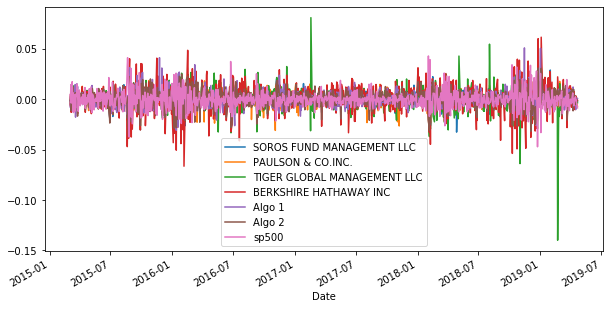

In [76]:
# Plot daily returns
# YOUR CODE HERE
joined_data_rows.plot(figsize=(10,5))

In [77]:
joined_data_rows.drop(columns=['Date'], inplace=True)
joined_data_rows.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


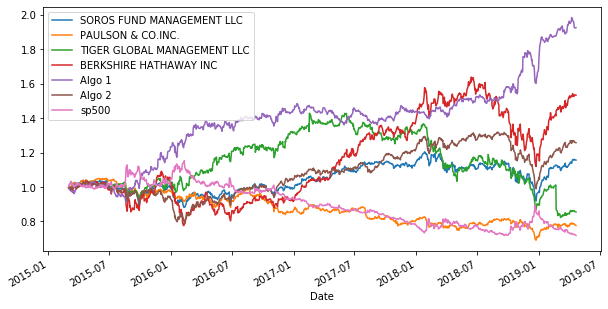

In [78]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1+joined_data_rows).cumprod()
cumulative_returns.plot(figsize=(10,5))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

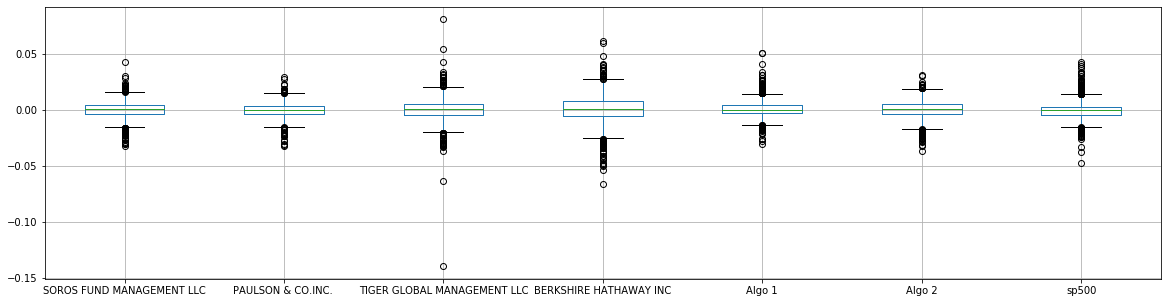

In [79]:
# Box plot to visually show risk
# YOUR CODE HERE
joined_data_rows.boxplot(figsize=(20,5))

In [80]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
std_all = joined_data_rows.std()
std_all

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
sp500                          0.008587
dtype: float64

In [81]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
std_risky = std_all > std_all['sp500']
std_risky

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500                          False
dtype: bool

In [82]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = joined_data_rows.std() * np.sqrt(252)
annualized_std.sort_values(inplace=True)
annualized_std

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
sp500                          0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

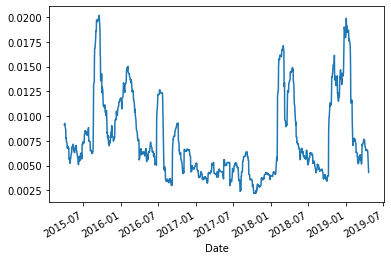

In [83]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
rolling_21_sp500 = joined_data_rows['sp500'].rolling(window=21).std().plot()
rolling_21_sp500

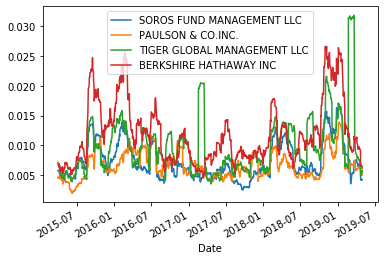

In [84]:
rolling_21_sp500 = whale_df.rolling(window=21).std().plot()
rolling_21_sp500

In [85]:
# Construct a correlation table
# YOUR CODE HERE
correlation = joined_data_rows.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
sp500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [86]:
import seaborn as sns

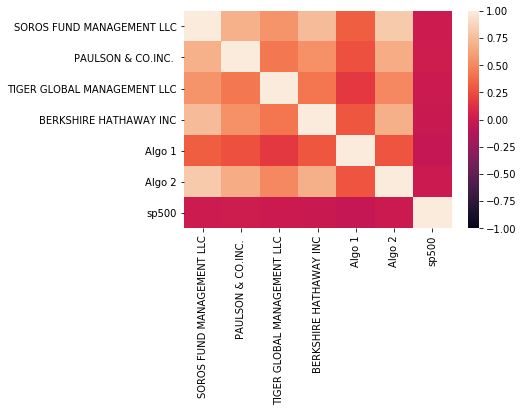

In [87]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [88]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
whale_covariance = joined_data_rows['Algo 1'].cov(joined_data_rows['sp500'])
whale_covariance

-2.2230425517155273e-06

In [89]:
variance = joined_data_rows['sp500'].var()
variance

7.373467552840441e-05

In [90]:
whale_beta = whale_covariance / variance
whale_beta

-0.030149214542337772

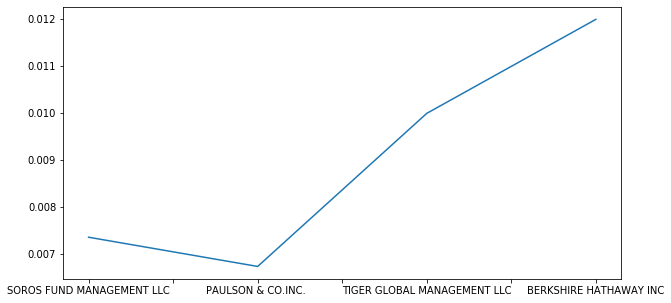

In [91]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
rolling_21_sp500 = whale_df.rolling(window=30).std().mean().plot(figsize=(10,5))
rolling_21_sp500


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [92]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (joined_data_rows.mean() * 252) / (joined_data_rows.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
sp500                         -0.518582
dtype: float64

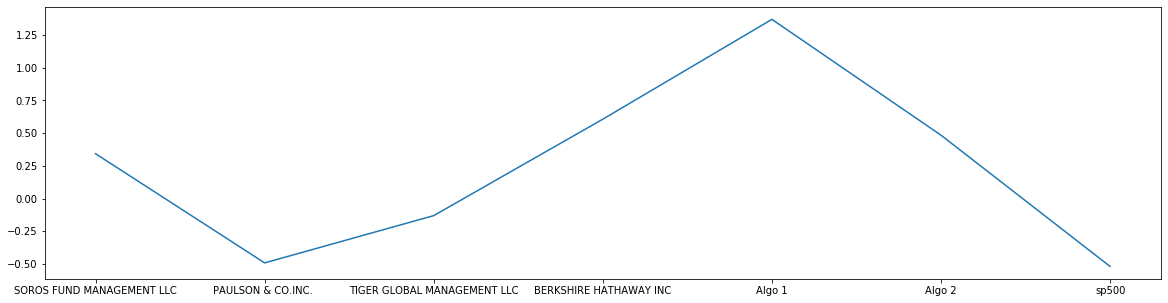

In [93]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(figsize=(20,5))

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [127]:
# Read the first stock
# YOUR CODE HERE
import pandas as pd
from pathlib import Path

In [130]:
apple_csv = Path('../apple.csv')
apple_df = pd.read_csv(apple_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
apple_df.head()

,Apple
Date,
2015-03-03,129.36
2015-03-04,128.54
2015-03-05,126.41
2015-03-06,126.60
2015-03-09,127.14


In [129]:
# Read the second stock
# YOUR CODE HERE
google_csv = Path('../google.csv')
google_df = pd.read_csv(google_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
google_df.head()

,Google
Date,
2015-03-03,572.07
2015-03-04,571.80
2015-03-05,573.76
2015-03-06,566.13
2015-03-09,567.29


In [131]:
# Read the third stock
# YOUR CODE HERE
PG_csv = Path('../PG.csv')
PG_df = pd.read_csv(PG_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
PG_df.head()

,PG
Date,
2015-03-03,85.16
2015-03-04,84.35
2015-03-05,84.63
2015-03-06,82.66
2015-03-09,83.09


In [132]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
all_stocks_df = pd.concat([apple_df, google_df, PG_df], axis="columns", join="inner")
all_stocks_df.head()

,Apple,Google,PG
Date,,,
2015-03-03,129.36,572.07,85.16
2015-03-04,128.54,571.80,84.35
2015-03-05,126.41,573.76,84.63
2015-03-06,126.60,566.13,82.66
2015-03-09,127.14,567.29,83.09


In [133]:
# Reset the index
# YOUR CODE HERE
#done above

In [100]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
#already done

In [134]:
# Drop Nulls
# YOUR CODE HERE
all_stocks_df.dropna(inplace=True)
all_stocks_df.head()

,Apple,Google,PG
Date,,,
2015-03-03,129.36,572.07,85.16
2015-03-04,128.54,571.80,84.35
2015-03-05,126.41,573.76,84.63
2015-03-06,126.60,566.13,82.66
2015-03-09,127.14,567.29,83.09


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [135]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
daily_change_all = all_stocks_df.pct_change()
daily_change_all.head()

,Apple,Google,PG
Date,,,
2015-03-03,NaN,NaN,NaN
2015-03-04,-0.006339,-0.000472,-0.009512
2015-03-05,-0.016571,0.003428,0.003320
2015-03-06,0.001503,-0.013298,-0.023278
2015-03-09,0.004265,0.002049,0.005202


In [136]:
daily_change_all.dropna(inplace=True)
daily_change_all.head()

,Apple,Google,PG
Date,,,
2015-03-04,-0.006339,-0.000472,-0.009512
2015-03-05,-0.016571,0.003428,0.003320
2015-03-06,0.001503,-0.013298,-0.023278
2015-03-09,0.004265,0.002049,0.005202
2015-03-10,-0.020686,-0.024326,-0.018654


In [137]:
weighted_returns = daily_change_all * weights
weighted_returns.head()

,Apple,Google,PG
Date,,,
2015-03-04,-0.002113,-0.000157,-0.003171
2015-03-05,-0.005524,0.001143,0.001107
2015-03-06,0.000501,-0.004433,-0.007759
2015-03-09,0.001422,0.000683,0.001734
2015-03-10,-0.006895,-0.008109,-0.006218


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [139]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
portfolio_comp_df = pd.concat([daily_change_all, joined_data_rows], axis="columns", join="inner")
portfolio_comp_df.head()

,Apple,Google,PG,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,sp500
Date,,,,,,,,,,,,
2015-03-04,-0.006339,-0.000472,-0.009512,2015-03-04,0.002230,0.003241,-0.002534,0.004213,2015-03-04,-0.008589,0.002416,-0.001195
2015-03-05,-0.016571,0.003428,0.003320,2015-03-05,0.004016,0.004076,0.002355,0.006726,2015-03-05,-0.000955,0.004323,0.014378
2015-03-06,0.001503,-0.013298,-0.023278,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,2015-03-06,-0.004957,-0.011460,-0.003929
2015-03-09,0.004265,0.002049,0.005202,2015-03-09,0.000582,0.004225,0.005843,-0.001652,2015-03-09,-0.005447,0.001303,0.017254
2015-03-10,-0.020686,-0.024326,-0.018654,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,2015-03-10,-0.001392,-0.012155,0.001921


In [140]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
portfolio_comp_df.dropna(inplace=True)
portfolio_comp_df.head()

,Apple,Google,PG,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,sp500
Date,,,,,,,,,,,,
2015-03-04,-0.006339,-0.000472,-0.009512,2015-03-04,0.002230,0.003241,-0.002534,0.004213,2015-03-04,-0.008589,0.002416,-0.001195
2015-03-05,-0.016571,0.003428,0.003320,2015-03-05,0.004016,0.004076,0.002355,0.006726,2015-03-05,-0.000955,0.004323,0.014378
2015-03-06,0.001503,-0.013298,-0.023278,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,2015-03-06,-0.004957,-0.011460,-0.003929
2015-03-09,0.004265,0.002049,0.005202,2015-03-09,0.000582,0.004225,0.005843,-0.001652,2015-03-09,-0.005447,0.001303,0.017254
2015-03-10,-0.020686,-0.024326,-0.018654,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,2015-03-10,-0.001392,-0.012155,0.001921


In [141]:
portfolio_comp_df.drop(columns=['Date'], inplace=True)
portfolio_comp_df.head()

,Apple,Google,PG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,,,
2015-03-04,-0.006339,-0.000472,-0.009512,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,-0.016571,0.003428,0.003320,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,0.001503,-0.013298,-0.023278,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.004265,0.002049,0.005202,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.020686,-0.024326,-0.018654,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [143]:
# Risk
# YOUR CODE HERE
std_all_portfolios = portfolio_comp_df.std()
std_all_portfolios

Apple                          0.017402
Google                         0.019237
PG                             0.010626
SOROS FUND MANAGEMENT LLC      0.008900
PAULSON & CO.INC.              0.006467
TIGER GLOBAL MANAGEMENT LLC    0.009570
BERKSHIRE HATHAWAY INC         0.015025
Algo 1                         0.009680
Algo 2                         0.009988
sp500                          0.010641
dtype: float64

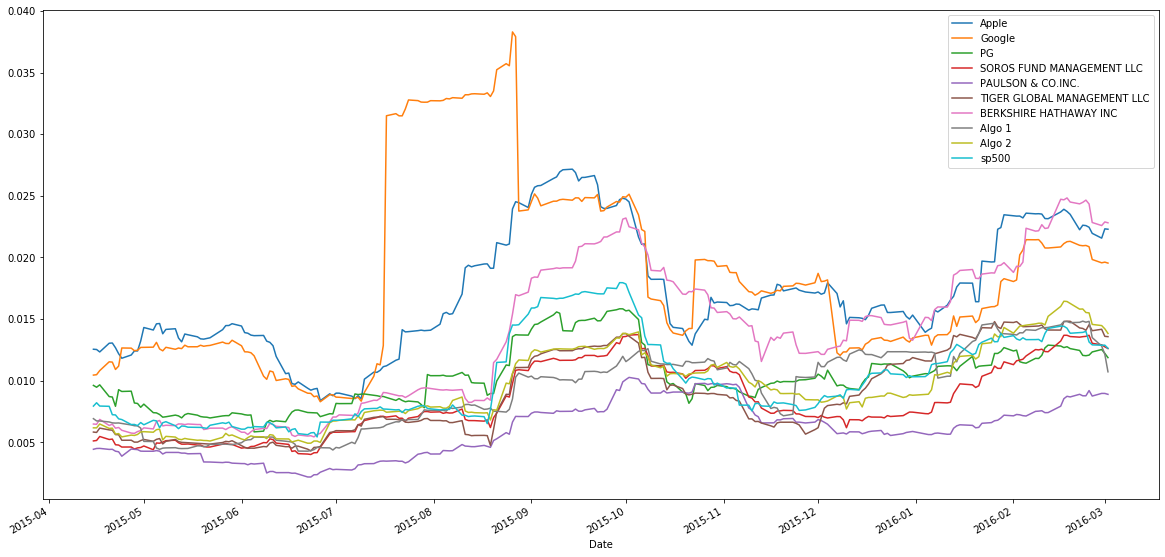

In [147]:
# Rolling
# YOUR CODE HERE
rolling_30_sp500 = portfolio_comp_df.rolling(window=30).std().plot(figsize=(20,10))
rolling_30_sp500

In [145]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios_portfolio = (portfolio_comp_df.mean() * 252) / (portfolio_comp_df.std() * np.sqrt(252))
sharpe_ratios_portfolio

Apple                         -0.766388
Google                         0.895641
PG                            -0.100435
SOROS FUND MANAGEMENT LLC     -0.241403
PAULSON & CO.INC.             -0.346885
TIGER GLOBAL MANAGEMENT LLC    0.489075
BERKSHIRE HATHAWAY INC        -0.459379
Algo 1                         1.802264
Algo 2                        -0.767085
sp500                          0.388281
dtype: float64

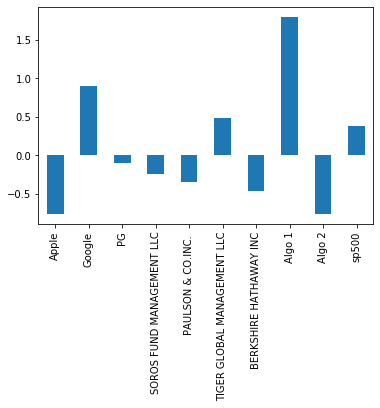

In [148]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios_portfolio.plot.bar()

In [149]:
# Create a correlation analysis
# YOUR CODE HERE
correlation_port = portfolio_comp_df.corr()
correlation_port


,Apple,Google,PG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Apple,1.000000,0.455298,0.474888,0.600418,0.497235,0.590504,0.536216,0.253852,0.612971,-0.044831
Google,0.455298,1.000000,0.440048,0.522369,0.455840,0.561137,0.534843,0.200941,0.460886,-0.053456
PG,0.474888,0.440048,1.000000,0.504330,0.449644,0.580449,0.399688,0.145126,0.490687,-0.007852
SOROS FUND MANAGEMENT LLC,0.600418,0.522369,0.504330,1.000000,0.829333,0.815998,0.775276,0.478812,0.887601,-0.036727
PAULSON & CO.INC.,0.497235,0.455840,0.449644,0.829333,1.000000,0.732820,0.654528,0.404989,0.729561,-0.001174
TIGER GLOBAL MANAGEMENT LLC,0.590504,0.561137,0.580449,0.815998,0.732820,1.000000,0.670145,0.370634,0.764808,-0.009040
BERKSHIRE HATHAWAY INC,0.536216,0.534843,0.399688,0.775276,0.654528,0.670145,1.000000,0.404867,0.694206,-0.032707
Algo 1,0.253852,0.200941,0.145126,0.478812,0.404989,0.370634,0.404867,1.000000,0.416106,-0.000844
Algo 2,0.612971,0.460886,0.490687,0.887601,0.729561,0.764808,0.694206,0.416106,1.000000,-0.025985
sp500,-0.044831,-0.053456,-0.007852,-0.036727,-0.001174,-0.009040,-0.032707,-0.000844,-0.025985,1.000000


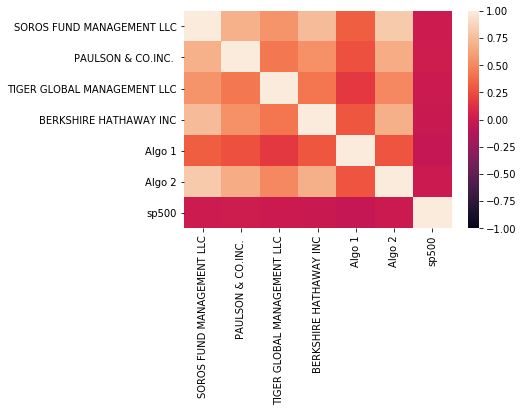

In [150]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [151]:
# Beta
# YOUR CODE HERE
variance_port = portfolio_comp_df.var()
variance_port

Apple                          0.000303
Google                         0.000370
PG                             0.000113
SOROS FUND MANAGEMENT LLC      0.000079
PAULSON & CO.INC.              0.000042
TIGER GLOBAL MANAGEMENT LLC    0.000092
BERKSHIRE HATHAWAY INC         0.000226
Algo 1                         0.000094
Algo 2                         0.000100
sp500                          0.000113
dtype: float64

In [153]:
covariance_port = portfolio_comp_df.cov()

In [155]:
beta_port = covariance_port / variance_port
beta_port

,Apple,Google,PG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Apple,1.000000,0.411876,0.777693,1.174036,1.338080,1.073747,0.621040,0.456342,1.068016,-0.073317
Google,0.503298,1.000000,0.796610,1.129105,1.356006,1.127917,0.684754,0.399308,0.887688,-0.096640
PG,0.289985,0.243083,1.000000,0.602180,0.738877,0.644505,0.282673,0.159308,0.522066,-0.007842
SOROS FUND MANAGEMENT LLC,0.307062,0.241669,0.422381,1.000000,1.141358,0.758823,0.459207,0.440197,0.790912,-0.030718
PAULSON & CO.INC.,0.184774,0.153237,0.273631,0.602610,1.000000,0.495172,0.281700,0.270541,0.472366,-0.000713
TIGER GLOBAL MANAGEMENT LLC,0.324746,0.279165,0.522759,0.877481,1.084522,1.000000,0.426844,0.366418,0.732844,-0.008131
BERKSHIRE HATHAWAY INC,0.462978,0.417751,0.565143,1.308894,1.520789,1.052127,1.000000,0.628410,1.044352,-0.046184
Algo 1,0.141211,0.101118,0.132206,0.520814,0.606253,0.374899,0.260845,1.000000,0.403303,-0.000768
Algo 2,0.351805,0.239291,0.461194,0.996110,1.126792,0.798167,0.461456,0.429315,1.000000,-0.024390
sp500,-0.027412,-0.029569,-0.007863,-0.043913,-0.001931,-0.010052,-0.023163,-0.000927,-0.027684,1.000000
